# ALL Notebook file and code written and done by (Yazeed mshayekh)

All the code and notebook are written and done by (Yazeed mshayekh)

In [1]:
!pip install tensorflow

  Using cached tensorflow-2.9.1-cp310-cp310-win_amd64.whl (444.1 MB)


ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'C:\\Users\\LPC\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python310\\site-packages\\tensorflow\\include\\external\\com_github_grpc_grpc\\src\\core\\ext\\filters\\client_channel\\lb_policy\\grpclb\\client_load_reporting_filter.h'
HINT: This error might have occurred since this system does not have Windows Long Path support enabled. You can find information on how to enable this at https://pip.pypa.io/warnings/enable-long-paths

You should consider upgrading via the 'C:\Users\LPC\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd 
import numpy as np 

#for visualization 
import matplotlib.pyplot as plt
import seaborn as sns 

#for preprocessing
import tensorflow as tf
import sklearn
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#analyze the results 
from sklearn.metrics import confusion_matrix, classification_report

**Let's load the data from the csv file**

there is an error happens sometimes if the encoding a little off and we can fix it by encoding="latin-1"
```
data = pd.read_csv("/content/gender-classifier-DFE-791531.csv",encoding="latin-1" )
```



In [3]:
data = pd.read_csv("/content/gender-classifier-DFE-791531.csv", encoding="latin-1")

In [4]:
#let's show the dataset and display all columns
data

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20045,815757572,True,golden,259,NaN,female,1.0000,yes,1.0,8/5/15 21:16,...,https://pbs.twimg.com/profile_images/656793310...,0,C0DEED,"@lookupondeath ...Fine, and I'll drink tea too...",NaN,783,10/26/15 13:20,6.587400e+17,Verona ªÁ,NaN
20046,815757681,True,golden,248,NaN,male,1.0000,yes,1.0,8/15/12 21:17,...,https://pbs.twimg.com/profile_images/639815429...,0,0,Greg Hardy you a good player and all but don't...,NaN,13523,10/26/15 12:40,6.587300e+17,"Kansas City, MO",NaN
20047,815757830,True,golden,264,NaN,male,1.0000,yes,1.0,9/3/12 1:17,...,https://pbs.twimg.com/profile_images/655473271...,0,C0DEED,You can miss people and still never want to se...,NaN,26419,10/26/15 13:20,6.587400e+17,Lagos Nigeria,NaN
20048,815757921,True,golden,250,NaN,female,0.8489,yes,1.0,11/6/12 23:46,...,https://pbs.twimg.com/profile_images/657716093...,0,0,@bitemyapp i had noticed your tendency to pee ...,NaN,56073,10/26/15 12:40,6.587300e+17,Texas Hill Country,NaN


#info about the columns in the dataset

1. **unitid**: a unique id for the user
2. **golden**: whether the user was included in the gold standard for the model; TRUE or FALSE
3. **trustedjudgments**: number of trusted judgments (int); always 3 for non-golden, and what may be a unique id for gold standard observations
4. **lastjudgment_at**: date and time of last contributor judgment; blank for gold standard observations
5. **gender**: one of male, female, or brand (for non-human profiles)
6. **gender:confidence**: a float representing confidence in the provided gender
7. **profile_yn**: “no” here seems to mean that the profile was meant to be part of the dataset but was not available when contributors went to judge it
8. **profile_yn: confidence**: confidence in the existence/non-existence of the profile
9. **created**: date and time when the profile was created
10. **description**: the user’s profile description
11. **fav_number**: number of tweets the user has favourited
12. **gender_gold**: if the profile is golden, what is the gender?
13. **link_color**: the link colour on the profile, as a hex value
14. **name**: the user’s name
15. **profileyngold**: whether the profile y/n value is golden
16. **profileimage**: a link to the profile image
17. **retweet_count**: number of times the user has retweeted (or possibly, been retweeted)
18. **sidebar_color**: color of the profile sidebar, as a hex value
19. **text**: text of a random one of the user’s tweets
20. **tweet_coord**: if the user has location turned on, the coordinates as a string with the format “[latitude, longitude]”
21. **tweet_count**: number of tweets that the user has posted
22. **tweet_created**: when the random tweet (in the text column) was created
23. **tweet_id**: the tweet id of the random tweet
24. **tweet_location**: location of the tweet; seems to not be particularly normalized
25. **user_timezone**: the timezone of the user
26. **the third columnn**(unitstate: state of the observation; one of finalized (for contributor-judged) or golden (for gold standard observations)





In [5]:
#To know the type of data in columns (numerical , categorical)  
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _unit_id               20050 non-null  int64  
 1   _golden                20050 non-null  bool   
 2   _unit_state            20050 non-null  object 
 3   _trusted_judgments     20050 non-null  int64  
 4   _last_judgment_at      20000 non-null  object 
 5   gender                 19953 non-null  object 
 6   gender:confidence      20024 non-null  float64
 7   profile_yn             20050 non-null  object 
 8   profile_yn:confidence  20050 non-null  float64
 9   created                20050 non-null  object 
 10  description            16306 non-null  object 
 11  fav_number             20050 non-null  int64  
 12  gender_gold            50 non-null     object 
 13  link_color             20050 non-null  object 
 14  name                   20050 non-null  object 
 15  pr

## **Preprocessing**

Check if there is a null values

In [6]:
data.isna().sum()

_unit_id                     0
_golden                      0
_unit_state                  0
_trusted_judgments           0
_last_judgment_at           50
gender                      97
gender:confidence           26
profile_yn                   0
profile_yn:confidence        0
created                      0
description               3744
fav_number                   0
gender_gold              20000
link_color                   0
name                         0
profile_yn_gold          20000
profileimage                 0
retweet_count                0
sidebar_color                0
text                         0
tweet_coord              19891
tweet_count                  0
tweet_created                0
tweet_id                     0
tweet_location            7484
user_timezone             7798
dtype: int64

In [7]:
data.isna().mean()

_unit_id                 0.000000
_golden                  0.000000
_unit_state              0.000000
_trusted_judgments       0.000000
_last_judgment_at        0.002494
gender                   0.004838
gender:confidence        0.001297
profile_yn               0.000000
profile_yn:confidence    0.000000
created                  0.000000
description              0.186733
fav_number               0.000000
gender_gold              0.997506
link_color               0.000000
name                     0.000000
profile_yn_gold          0.997506
profileimage             0.000000
retweet_count            0.000000
sidebar_color            0.000000
text                     0.000000
tweet_coord              0.992070
tweet_count              0.000000
tweet_created            0.000000
tweet_id                 0.000000
tweet_location           0.373267
user_timezone            0.388928
dtype: float64

OK, as we see there is some columns have high percentage of null values so let's modifying data 

In [8]:
data.shape

(20050, 26)

In [9]:
#check the unnecessary columns with high number of unique values 
data.nunique()

_unit_id                 20050
_golden                      2
_unit_state                  2
_trusted_judgments          32
_last_judgment_at          283
gender                       4
gender:confidence          923
profile_yn                   2
profile_yn:confidence      267
created                  18699
description              15140
fav_number                6784
gender_gold                  6
link_color                3001
name                     18795
profile_yn_gold              1
profileimage             17164
retweet_count               22
sidebar_color              561
text                     18412
tweet_coord                146
tweet_count              14280
tweet_created                5
tweet_id                     2
tweet_location            7864
user_timezone              156
dtype: int64

In [10]:
#as wee see there is a number of unnecessary columns
unnecessary_cols = ['_unit_id','name','profileimage','tweet_id']

Before we drop columns with over than 30% missing values, let is take a look in gender column

In [11]:
data['gender'].unique()

array(['male', 'female', 'brand', 'unknown', nan], dtype=object)

As we see there is a unknown values in gender columns which is not useful so will replace the unknown with Nan by using np.NaN and after that drop columns 

In [12]:
#the shape before drop the columns with missing values
data['gender'].shape

(20050,)

******************************************************************************************************

here we use true,false series of missing values in gender column to be the index of the original dataframe 

In [13]:
#this will returns only the rows which have the missing values in gender column 
data[data['gender'].isna()].index

Int64Index([  109,   137,   496,   582,   679,   749,  1179,  1664,  1698,
             1963,  2118,  2245,  2272,  2377,  2537,  2596,  2717,  2751,
             2765,  2886,  2980,  3190,  3195,  3219,  3337,  3381,  3553,
             3791,  3942,  4008,  4072,  4222,  4529,  4641,  4749,  4978,
             5073,  6023,  6279,  6305,  6426,  6700,  6988,  7436,  7823,
             7985,  8202,  8432,  8706,  8877,  9198,  9282,  9288,  9326,
             9804,  9923, 10252, 10293, 10320, 10386, 10605, 11019, 11080,
            11161, 11273, 11459, 11577, 12103, 12889, 13007, 14045, 15018,
            15243, 15270, 15428, 15450, 15740, 15921, 16208, 16365, 16640,
            16886, 16991, 17114, 17163, 18001, 18048, 18063, 18070, 18122,
            18136, 18303, 18524, 18700, 18840, 19773, 19842],
           dtype='int64')

_______________________________________________________________________

To know the columns which have over than 30% missing values 

In [14]:
data.isna().mean() > 0.3

_unit_id                 False
_golden                  False
_unit_state              False
_trusted_judgments       False
_last_judgment_at        False
gender                   False
gender:confidence        False
profile_yn               False
profile_yn:confidence    False
created                  False
description              False
fav_number               False
gender_gold               True
link_color               False
name                     False
profile_yn_gold           True
profileimage             False
retweet_count            False
sidebar_color            False
text                     False
tweet_coord               True
tweet_count              False
tweet_created            False
tweet_id                 False
tweet_location            True
user_timezone             True
dtype: bool

As we see, we have true,false series... the true indicate the columns which have over than 30% missing values, the true indicate the columns which have lower than 30% missing values

In [15]:
#get the column names with over than 30% missing values
over_30_per_missing = data.columns[data.isna().mean() > 0.3]
over_30_per_missing

Index(['gender_gold', 'profile_yn_gold', 'tweet_coord', 'tweet_location',
       'user_timezone'],
      dtype='object')

In [17]:
#text will indicate pandas series of text
#vocab_lenght will indicate how many of the most frequent words do we want to use 
def get_sequences(texts, vocab_lenght):
    #tokenizer it will assign each word to a unique integer from one to vocab_lenght. So, the most frequent word will be given a value of one, the next most frequent will be given a value of two 
    #tokenizer it is really cool it has a lot of filtering methods built into it, it is can filter out any special characters, any pure, any punctuation... then it is going to lower case the whole thing and then split it on white space   
    tokenizer = Tokenizer(num_words=vocab_lenght)
    tokenizer.fit_on_texts(texts)#this will just collect all the information about the frequency of each word 

    sequences = tokenizer.texts_to_sequences(texts)#from text to sequences 

    max_seq_length = np.max([len(sequence) for sequence in sequences])#to know the sequence with maximum length

    print(max_seq_length)

    sequences = pad_sequences(sequences, maxlen= max_seq_length, padding='post')#to pad all the the sequences so they all take the same length by add zeros to the end(padding to put all zeros in the end)

    return sequences 

In [ ]:
#get_sequences(data['text'], vocab_lenght=10000)

[[599, 6, 8511, 168, 186, 420, 3630, 4066, 11, 1, 5, 3, 4],
 [8512,
  1122,
  37,
  53,
  170,
  18,
  233,
  2,
  7,
  35,
  783,
  1,
  369,
  22,
  5,
  3,
  4,
  5433,
  6591,
  5,
  3,
  4],
 [7, 1309, 6592, 48, 1614, 803, 1, 818, 15, 2061, 20, 330, 40, 15, 819, 80],
 [292,
  240,
  23,
  1,
  3631,
  47,
  10,
  217,
  64,
  8513,
  75,
  72,
  3632,
  2187,
  16,
  1,
  5,
  3,
  4],
 [375,
  6593,
  16,
  1496,
  3633,
  41,
  22,
  1,
  2062,
  699,
  699,
  699,
  764,
  614,
  664,
  614,
  2062],
 [1615, 425, 69, 16, 1, 996, 22, 4653, 8514, 1690, 5, 3, 4],
 [162, 10, 12, 33, 6594, 283, 43, 145, 376, 9, 1, 997],
 [882,
  941,
  1278,
  838,
  12,
  1691,
  1,
  1552,
  685,
  265,
  700,
  941,
  1616,
  882,
  13,
  121,
  677,
  105,
  1756,
  5,
  3,
  4],
 [1, 765, 34, 8515, 2, 8515, 8516, 1310],
 [30,
  61,
  1123,
  13,
  1,
  1497,
  24,
  104,
  137,
  425,
  15,
  58,
  1851,
  58,
  24,
  1617,
  3256],
 [61, 32, 10, 557, 376, 9, 446, 5, 3, 4],
 [920, 2963, 41, 131

As we see, this is the first tweet [599, 6, 8511, 168, 186, 420, 3630, 4066, 11, 1, 5, 3, 4], each word in the tweet has been encoded to a unique integer from 1 to 10000 

if we look, we have a varying lengths here it is not in the great way fo feed it into model, so we are going to pad all the the sequences so they all take the same length by add zeros to the end  

In [ ]:
get_sequences(data['text'], vocab_lenght=10000)

104


array([[ 599,    6, 8511, ...,    0,    0,    0],
       [8512, 1122,   37, ...,    0,    0,    0],
       [   7, 1309, 6592, ...,    0,    0,    0],
       ...,
       [  10,   50,  285, ...,    0,    0,    0],
       [   7,  102, 2058, ...,    0,    0,    0],
       [   7,  101,   12, ...,    0,    0,    0]], dtype=int32)

In [18]:
def hex_to_decimal(x):
    try:
      return np.int(x ,16)#convert from hexadecimal to decimal 
    except:
      return 0 #if we have error(the color codes which is set to zero) we're  just going to return zero

#get a list of colors 
#we're going to pass into color column and return three new columns(reds, blues, greens)

def get_rgb(colors):
    
    red = colors.apply(lambda x : hex_to_decimal(x[0:2]))#the first two characters represent to red 
    green = colors.apply(lambda x : hex_to_decimal(x[2:4]))#the second two characters represent to green 
    blue = colors.apply(lambda x : hex_to_decimal(x[4:6]))#the third two characters represent to blue
    #but this is not enough this us just going to be a string
    #So I'm going to convert from hexadecimal to decimal 
    #but there is one issue, some of the color codes just gets set to zero
    
    return red, green, blue

In [20]:
def preprocess_inputs(df):
    #we will not accidentally modifying, we want to keep as it is  
    df = df.copy()

    #please if you want to show the changes, active this code by running the cell which contains the (Data_1)
    #Drop unnecessary columns (as shown in Data_1 output)
    df = df.drop(unnecessary_cols, axis=1)

    #please if you want to show the changes, active this code by running the cell which contains the (Target_1)
    #Encode unknown values in the target column as np.Nan (as shown in the Target_1 output)
    df['gender'] = df['gender'].replace('unknown', np.NaN)
    
    #please if you want to show the changes, active this code by running the cell which contains the (Data_2)
    #Drop rows with missing target values (as shown in Data_2 output)
    gender_nas = df[df['gender'].isna()].index
    df = df.drop(gender_nas, axis=0).reset_index(drop=True)#this will prevents the old indecies becoming a new column in df

    #please if you want to show the changes, active this code by running the cell which contains the (Data_3)
    #Drop columns with over than 30% missing values (as shown in Data_3 output)
    missing_cols = over_30_per_missing
    df = df.drop(missing_cols, axis=1)

    #please if you want to show the changes, active this code running the cell which contains the (Data_4)
    #There are only 50 remaining missing values in the _last_judgment_at columns, so let's drop those rows (as shown in Data_4 output)
    judgment_nas = df[df['_last_judgment_at'].isna()].index
    df = df.drop(judgment_nas, axis=0).reset_index(drop=True)

    #please if you want to show the changes, active this code by running the cell which contains the (Data_5)
    #Let's encode the missing values in the description column as empty string (as shown in Data_5 output)
    df['description'] = df['description'].fillna('')

    #please if you want to show the changes, active this code by running the cell which contains the (Data_6)
    #Create date/time cols, replacing the original time cols with a bunch of new cols based on the data in each one, to be able to fed into the model (as shown Data_6 output)
    for column in ['_last_judgment_at','created','tweet_created']:
      #this code will return a column but in date/time format
      df[column] = pd.to_datetime(df[column])
    
    df['_last_judgment_year'] = df['_last_judgment_at'].apply(lambda x : x.year)
    df['_last_judgment_month'] = df['_last_judgment_at'].apply(lambda x : x.month)
    df['_last_judgment_day'] = df['_last_judgment_at'].apply(lambda x : x.day)
    df['_last_judgment_hour'] = df['_last_judgment_at'].apply(lambda x : x.hour)

    df['created_year'] = df['created'].apply(lambda x : x.year)
    df['created_month'] = df['created'].apply(lambda x : x.month)
    df['created_day'] = df['created'].apply(lambda x : x.day)
    df['created_hour'] = df['created'].apply(lambda x : x.hour)

    df['tweet_created_year'] = df['tweet_created'].apply(lambda x : x.year)
    df['tweet_created_month'] = df['tweet_created'].apply(lambda x : x.month)
    df['tweet_created_day'] = df['tweet_created'].apply(lambda x : x.day)
    df['tweet_created_hour'] = df['tweet_created'].apply(lambda x : x.hour)
    
    df = df.drop(['_last_judgment_at','created','tweet_created'], axis=1)

    #please if you want to show the changes, active this code by running the cell which contains the (Data_7)
    #get the sequence data for description and text cols.(as shown in the Data_7 output)
    
    desc_seq = get_sequences(df['description'], vocab_lenght=20000)
    tweets = get_sequences(df['text'], vocab_lenght=20000)

    df = df.drop(['description', 'text'], axis=1)

    #please if you want to show the changes, active this code by running the cell which contains the (Data_7)
    #Drop the cols with only one unique values.(as shown in the Data_7 output)
    df = df.drop(['_golden', '_unit_state', 'profile_yn' ,'_trusted_judgments','_last_judgment_month','_last_judgment_year','tweet_created_day','tweet_created_month','tweet_created_year'], axis=1) 

    #please if you want to show the changes, active this code by running the cell which contains the (Data_8)
    #Encode color columns as RGB values (as shown in the Data_8 output)
    df['link_red'], df['link_green'], df['link_blue'] = get_rgb(df['link_color']) 
    df['sidebar_red'], df['sidebar_green'], df['sidebar_blue'] = get_rgb(df['sidebar_color']) 

    df = df.drop(['link_color', 'sidebar_color'], axis=1)

    #Encode label column that as 0 1 and 2
    label_mapping = {'female':0, 'male':1, 'brand':2}
    df['gender'] = df['gender'].replace(label_mapping)

    #split df into X and y(target)
    X = df.drop('gender', axis=1).copy()
    y = df['gender'].copy()

    #Scale the X with standard scaler
    scaler = StandardScaler()
    X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)#this will allow each column to take a very similar range of values and will improve the model's performance 
      
   #return df #for code in line 83 
    return X, desc_seq, tweets, y

In [ ]:
#check if we drop the unnecessry cloumns 
#check_fdrop = preprocess_inputs(data)
#check_fdrop

In [ ]:
Data, Target =preprocess_inputs(data)
Data

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender:confidence,profile_yn,profile_yn:confidence,created,description,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,1.0000,yes,1.0,12/5/13 1:48,i sing my own rhythm.,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,1.0000,yes,1.0,10/1/12 13:51,I'm the author of novels filled with family dr...,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,0.6625,yes,1.0,11/28/14 11:30,louis whining and squealing and all,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,1.0000,yes,1.0,6/11/09 22:39,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,1.0000,yes,1.0,4/16/14 13:23,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20045,815757572,True,golden,259,NaN,1.0000,yes,1.0,8/5/15 21:16,(rp),...,https://pbs.twimg.com/profile_images/656793310...,0,C0DEED,"@lookupondeath ...Fine, and I'll drink tea too...",NaN,783,10/26/15 13:20,6.587400e+17,Verona ªÁ,NaN
20046,815757681,True,golden,248,NaN,1.0000,yes,1.0,8/15/12 21:17,"Whatever you like, it's not a problem at all. ...",...,https://pbs.twimg.com/profile_images/639815429...,0,0,Greg Hardy you a good player and all but don't...,NaN,13523,10/26/15 12:40,6.587300e+17,"Kansas City, MO",NaN
20047,815757830,True,golden,264,NaN,1.0000,yes,1.0,9/3/12 1:17,#TeamBarcelona ..You look lost so you should f...,...,https://pbs.twimg.com/profile_images/655473271...,0,C0DEED,You can miss people and still never want to se...,NaN,26419,10/26/15 13:20,6.587400e+17,Lagos Nigeria,NaN
20048,815757921,True,golden,250,NaN,0.8489,yes,1.0,11/6/12 23:46,Anti-statist; I homeschool my kids. Aspiring t...,...,https://pbs.twimg.com/profile_images/657716093...,0,0,@bitemyapp i had noticed your tendency to pee ...,NaN,56073,10/26/15 12:40,6.587300e+17,Texas Hill Country,NaN


As we see there is a 20050 rows and 25 columns

In [ ]:
#let's drop the unnecessary columns with high number of unique values 
Data_1, Target_1 =preprocess_inputs(data)
Data_1

,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender:confidence,profile_yn,profile_yn:confidence,created,description,fav_number,...,link_color,profile_yn_gold,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_location,user_timezone
0,False,finalized,3,10/26/15 23:24,1.0000,yes,1.0,12/5/13 1:48,i sing my own rhythm.,0,...,08C2C2,NaN,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,main; @Kan1shk3,Chennai
1,False,finalized,3,10/26/15 23:30,1.0000,yes,1.0,10/1/12 13:51,I'm the author of novels filled with family dr...,68,...,0084B4,NaN,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,NaN,Eastern Time (US & Canada)
2,False,finalized,3,10/26/15 23:33,0.6625,yes,1.0,11/28/14 11:30,louis whining and squealing and all,7696,...,ABB8C2,NaN,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,clcncl,Belgrade
3,False,finalized,3,10/26/15 23:10,1.0000,yes,1.0,6/11/09 22:39,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",202,...,0084B4,NaN,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,"Palo Alto, CA",Pacific Time (US & Canada)
4,False,finalized,3,10/27/15 1:15,1.0000,yes,1.0,4/16/14 13:23,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,37318,...,3B94D9,NaN,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20045,True,golden,259,NaN,1.0000,yes,1.0,8/5/15 21:16,(rp),302,...,0084B4,yes,0,C0DEED,"@lookupondeath ...Fine, and I'll drink tea too...",NaN,783,10/26/15 13:20,Verona ªÁ,NaN
20046,True,golden,248,NaN,1.0000,yes,1.0,8/15/12 21:17,"Whatever you like, it's not a problem at all. ...",2513,...,CFB929,yes,0,0,Greg Hardy you a good player and all but don't...,NaN,13523,10/26/15 12:40,"Kansas City, MO",NaN
20047,True,golden,264,NaN,1.0000,yes,1.0,9/3/12 1:17,#TeamBarcelona ..You look lost so you should f...,50,...,0084B4,yes,0,C0DEED,You can miss people and still never want to se...,NaN,26419,10/26/15 13:20,Lagos Nigeria,NaN
20048,True,golden,250,NaN,0.8489,yes,1.0,11/6/12 23:46,Anti-statist; I homeschool my kids. Aspiring t...,70804,...,9266CC,yes,0,0,@bitemyapp i had noticed your tendency to pee ...,NaN,56073,10/26/15 12:40,Texas Hill Country,NaN


As wee see after drop the unnecessary columns with high number of unique values we now have 21 columns 

_____________________________________________

let's take a look to the unique values in the target column 

In [ ]:
#we have unknown values which is not useful. So, we going to encode unknown values in the target column unsing np.Nan
Target_1.unique()

array(['male', 'female', 'brand', 'unknown', nan], dtype=object)

In [ ]:
Target_1.unique()

array(['male', 'female', 'brand', nan], dtype=object)

As we see the unknown values replaced with nan, now we're going to go a head and drop the missing target values 

In [ ]:
Data_2, Target_2 =preprocess_inputs(data)
Data_2

,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender:confidence,profile_yn,profile_yn:confidence,created,description,fav_number,...,link_color,profile_yn_gold,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_location,user_timezone
0,False,finalized,3,10/26/15 23:24,1.0000,yes,1.0,12/5/13 1:48,i sing my own rhythm.,0,...,08C2C2,NaN,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,main; @Kan1shk3,Chennai
1,False,finalized,3,10/26/15 23:30,1.0000,yes,1.0,10/1/12 13:51,I'm the author of novels filled with family dr...,68,...,0084B4,NaN,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,NaN,Eastern Time (US & Canada)
2,False,finalized,3,10/26/15 23:33,0.6625,yes,1.0,11/28/14 11:30,louis whining and squealing and all,7696,...,ABB8C2,NaN,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,clcncl,Belgrade
3,False,finalized,3,10/26/15 23:10,1.0000,yes,1.0,6/11/09 22:39,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",202,...,0084B4,NaN,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,"Palo Alto, CA",Pacific Time (US & Canada)
4,False,finalized,3,10/27/15 1:15,1.0000,yes,1.0,4/16/14 13:23,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,37318,...,3B94D9,NaN,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18831,True,golden,259,NaN,1.0000,yes,1.0,8/5/15 21:16,(rp),302,...,0084B4,yes,0,C0DEED,"@lookupondeath ...Fine, and I'll drink tea too...",NaN,783,10/26/15 13:20,Verona ªÁ,NaN
18832,True,golden,248,NaN,1.0000,yes,1.0,8/15/12 21:17,"Whatever you like, it's not a problem at all. ...",2513,...,CFB929,yes,0,0,Greg Hardy you a good player and all but don't...,NaN,13523,10/26/15 12:40,"Kansas City, MO",NaN
18833,True,golden,264,NaN,1.0000,yes,1.0,9/3/12 1:17,#TeamBarcelona ..You look lost so you should f...,50,...,0084B4,yes,0,C0DEED,You can miss people and still never want to se...,NaN,26419,10/26/15 13:20,Lagos Nigeria,NaN
18834,True,golden,250,NaN,0.8489,yes,1.0,11/6/12 23:46,Anti-statist; I homeschool my kids. Aspiring t...,70804,...,9266CC,yes,0,0,@bitemyapp i had noticed your tendency to pee ...,NaN,56073,10/26/15 12:40,Texas Hill Country,NaN


In [ ]:
Target_2.shape

(18836,)

After Drop the rows with missing target values, we have 18836 rows and 21 columns 

Now let's drop columns with over than 30% missing values 

In [ ]:
Data_3, Target_3 =preprocess_inputs(data)
Data_3

,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender:confidence,profile_yn,profile_yn:confidence,created,description,fav_number,link_color,retweet_count,sidebar_color,text,tweet_count,tweet_created
0,False,finalized,3,10/26/15 23:24,1.0000,yes,1.0,12/5/13 1:48,i sing my own rhythm.,0,08C2C2,0,FFFFFF,Robbie E Responds To Critics After Win Against...,110964,10/26/15 12:40
1,False,finalized,3,10/26/15 23:30,1.0000,yes,1.0,10/1/12 13:51,I'm the author of novels filled with family dr...,68,0084B4,0,C0DEED,ÛÏIt felt like they were my friends and I was...,7471,10/26/15 12:40
2,False,finalized,3,10/26/15 23:33,0.6625,yes,1.0,11/28/14 11:30,louis whining and squealing and all,7696,ABB8C2,1,C0DEED,i absolutely adore when louis starts the songs...,5617,10/26/15 12:40
3,False,finalized,3,10/26/15 23:10,1.0000,yes,1.0,6/11/09 22:39,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",202,0084B4,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,1693,10/26/15 12:40
4,False,finalized,3,10/27/15 1:15,1.0000,yes,1.0,4/16/14 13:23,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,37318,3B94D9,0,0,Watching Neighbours on Sky+ catching up with t...,31462,10/26/15 12:40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18831,True,golden,259,NaN,1.0000,yes,1.0,8/5/15 21:16,(rp),302,0084B4,0,C0DEED,"@lookupondeath ...Fine, and I'll drink tea too...",783,10/26/15 13:20
18832,True,golden,248,NaN,1.0000,yes,1.0,8/15/12 21:17,"Whatever you like, it's not a problem at all. ...",2513,CFB929,0,0,Greg Hardy you a good player and all but don't...,13523,10/26/15 12:40
18833,True,golden,264,NaN,1.0000,yes,1.0,9/3/12 1:17,#TeamBarcelona ..You look lost so you should f...,50,0084B4,0,C0DEED,You can miss people and still never want to se...,26419,10/26/15 13:20
18834,True,golden,250,NaN,0.8489,yes,1.0,11/6/12 23:46,Anti-statist; I homeschool my kids. Aspiring t...,70804,9266CC,0,0,@bitemyapp i had noticed your tendency to pee ...,56073,10/26/15 12:40


After drop columns with over than 30% missing values, we have 16 cols and 18836 rows, Now let's check the remaining missing values

In [ ]:
#check the columns with missing values after 
Data_3.isna().sum()

_golden                     0
_unit_state                 0
_trusted_judgments          0
_last_judgment_at          50
gender:confidence           0
profile_yn                  0
profile_yn:confidence       0
created                     0
description              3314
fav_number                  0
link_color                  0
retweet_count               0
sidebar_color               0
text                        0
tweet_count                 0
tweet_created               0
dtype: int64

We only have two colums with remaining missing values 
1. _last_judgment_at
2. description

we must understand what kind of data in these two columns. 
_last_judgment_at: it is a date time column and there is only 50 missing values what we could do is create a bunch of new columns the year, month, day, hour times values from the original date time and then we could fill the means for each of those for these 50 missing values but it is only 50 missing values and we can going to drop those 50 rows because it not like a big loss it'll be all right


In [ ]:
#data after drop the 50 rows with missing values in the _last_judgment_at column
Data_4, Target_4 = preprocess_inputs(data)

In [ ]:
#check the columns with missing values after drop the 50 rows with missing values in the _last_judgment_at column
Data_4.isna().sum()

_golden                     0
_unit_state                 0
_trusted_judgments          0
_last_judgment_at           0
gender:confidence           0
profile_yn                  0
profile_yn:confidence       0
created                     0
description              3308
fav_number                  0
link_color                  0
retweet_count               0
sidebar_color               0
text                        0
tweet_count                 0
tweet_created               0
dtype: int64

now we only have the missing values in the description column.
the description column this is a text column and this is actually very important, this probably has a lot of a information about a person's gender(this is talk about how people describe themselves)

Let's encode the missing values in the description column as empty strings

In [ ]:
#the Data after encode the missing values in the discription column as empty strings
Data_5, Target_5 = preprocess_inputs(data)
Data_5

,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender:confidence,profile_yn,profile_yn:confidence,created,description,fav_number,link_color,retweet_count,sidebar_color,text,tweet_count,tweet_created
0,False,finalized,3,10/26/15 23:24,1.0000,yes,1.0,12/5/13 1:48,i sing my own rhythm.,0,08C2C2,0,FFFFFF,Robbie E Responds To Critics After Win Against...,110964,10/26/15 12:40
1,False,finalized,3,10/26/15 23:30,1.0000,yes,1.0,10/1/12 13:51,I'm the author of novels filled with family dr...,68,0084B4,0,C0DEED,ÛÏIt felt like they were my friends and I was...,7471,10/26/15 12:40
2,False,finalized,3,10/26/15 23:33,0.6625,yes,1.0,11/28/14 11:30,louis whining and squealing and all,7696,ABB8C2,1,C0DEED,i absolutely adore when louis starts the songs...,5617,10/26/15 12:40
3,False,finalized,3,10/26/15 23:10,1.0000,yes,1.0,6/11/09 22:39,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",202,0084B4,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,1693,10/26/15 12:40
4,False,finalized,3,10/27/15 1:15,1.0000,yes,1.0,4/16/14 13:23,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,37318,3B94D9,0,0,Watching Neighbours on Sky+ catching up with t...,31462,10/26/15 12:40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18781,False,finalized,3,10/26/15 23:04,1.0000,yes,1.0,1/24/13 11:55,XXI,33834,ABB8C2,1,0,Seriously love Trent and Justin. Would do anyt...,29190,10/26/15 13:18
18782,False,finalized,3,10/27/15 1:40,1.0000,yes,1.0,12/19/14 13:54,607. Money in the making. Take it a day at a t...,2462,0084B4,0,C0DEED,One person can look at you like your the most ...,11117,10/26/15 13:18
18783,False,finalized,3,10/27/15 0:03,1.0000,yes,1.0,4/15/15 19:15,I can quote (Insert movie) better than you and...,1855,664422,0,0,These 24 Wedding Photobombs Made The Bride And...,5640,10/26/15 13:18
18784,False,finalized,3,10/26/15 22:27,0.6593,yes,1.0,4/6/15 13:43,| Kingdom Hearts | Alice | Sims | Minecraft | ...,2160,05B8CC,0,0,So I am riding around and I saw a horse runnin...,2041,10/26/15 13:18


Now we have 18786 rows and 16 cloumns. So, we still have a lot of data

Now we going to deal with data types , for numerical columns if we take a look they are already ready to be fed into the model after some scaling, but for categorical cols these need to be transformed in some way to can be fed into the model 

if we take a look in the ['_last_judgment_at', 'created', 'tweet_created'], it is a date/time, So what we're going to do is create a bunch of new columns based on the data in each one 

In [ ]:
#check the Data after encode the missing values in the discription column as empty strings
Data_5.isna().sum()

_golden                  0
_unit_state              0
_trusted_judgments       0
_last_judgment_at        0
gender:confidence        0
profile_yn               0
profile_yn:confidence    0
created                  0
description              0
fav_number               0
link_color               0
retweet_count            0
sidebar_color            0
text                     0
tweet_count              0
tweet_created            0
dtype: int64

Now we have no more missing values, we're totally done with missing values

In [ ]:
Data_6, Target_6 = preprocess_inputs(data)
Data_6

,_golden,_unit_state,_trusted_judgments,gender:confidence,profile_yn,profile_yn:confidence,description,fav_number,link_color,retweet_count,...,_last_judgment_day,_last_judgment_hour,created_year,created_month,created_day,created_hour,tweet_created_year,tweet_created_month,tweet_created_day,tweet_created_hour
0,False,finalized,3,1.0000,yes,1.0,i sing my own rhythm.,0,08C2C2,0,...,26,23,2013,12,5,1,2015,10,26,12
1,False,finalized,3,1.0000,yes,1.0,I'm the author of novels filled with family dr...,68,0084B4,0,...,26,23,2012,10,1,13,2015,10,26,12
2,False,finalized,3,0.6625,yes,1.0,louis whining and squealing and all,7696,ABB8C2,1,...,26,23,2014,11,28,11,2015,10,26,12
3,False,finalized,3,1.0000,yes,1.0,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",202,0084B4,0,...,26,23,2009,6,11,22,2015,10,26,12
4,False,finalized,3,1.0000,yes,1.0,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,37318,3B94D9,0,...,27,1,2014,4,16,13,2015,10,26,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18781,False,finalized,3,1.0000,yes,1.0,XXI,33834,ABB8C2,1,...,26,23,2013,1,24,11,2015,10,26,13
18782,False,finalized,3,1.0000,yes,1.0,607. Money in the making. Take it a day at a t...,2462,0084B4,0,...,27,1,2014,12,19,13,2015,10,26,13
18783,False,finalized,3,1.0000,yes,1.0,I can quote (Insert movie) better than you and...,1855,664422,0,...,27,0,2015,4,15,19,2015,10,26,13
18784,False,finalized,3,0.6593,yes,1.0,| Kingdom Hearts | Alice | Sims | Minecraft | ...,2160,05B8CC,0,...,26,22,2015,4,6,13,2015,10,26,13


So, now we have 12 new cols with the information taken from the date/time cols 

Now we're going to deal with description,text 

we're actually going to feed these bits of information in separately. we're going to feed each one in a sequence of toknized words which each word is mapped to unique integer. 

____________

In [ ]:
Data_7, desc, tweets, Target_7 = preprocess_inputs(data)
Data_7

62
104


,_golden,_unit_state,_trusted_judgments,gender:confidence,profile_yn,profile_yn:confidence,fav_number,link_color,retweet_count,sidebar_color,...,_last_judgment_day,_last_judgment_hour,created_year,created_month,created_day,created_hour,tweet_created_year,tweet_created_month,tweet_created_day,tweet_created_hour
0,False,finalized,3,1.0000,yes,1.0,0,08C2C2,0,FFFFFF,...,26,23,2013,12,5,1,2015,10,26,12
1,False,finalized,3,1.0000,yes,1.0,68,0084B4,0,C0DEED,...,26,23,2012,10,1,13,2015,10,26,12
2,False,finalized,3,0.6625,yes,1.0,7696,ABB8C2,1,C0DEED,...,26,23,2014,11,28,11,2015,10,26,12
3,False,finalized,3,1.0000,yes,1.0,202,0084B4,0,C0DEED,...,26,23,2009,6,11,22,2015,10,26,12
4,False,finalized,3,1.0000,yes,1.0,37318,3B94D9,0,0,...,27,1,2014,4,16,13,2015,10,26,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18781,False,finalized,3,1.0000,yes,1.0,33834,ABB8C2,1,0,...,26,23,2013,1,24,11,2015,10,26,13
18782,False,finalized,3,1.0000,yes,1.0,2462,0084B4,0,C0DEED,...,27,1,2014,12,19,13,2015,10,26,13
18783,False,finalized,3,1.0000,yes,1.0,1855,664422,0,0,...,27,0,2015,4,15,19,2015,10,26,13
18784,False,finalized,3,0.6593,yes,1.0,2160,05B8CC,0,0,...,26,22,2015,4,6,13,2015,10,26,13


we drop the text and description cols from the original df, and store it with a new form in the desc, tweets vars

In [ ]:
print(desc.shape)
desc

(18786, 62)


array([[    6,  1425,     9, ...,     0,     0,     0],
       [   24,     2,   115, ...,     0,     0,     0],
       [  730, 12210,     1, ...,     0,     0,     0],
       ...,
       [    6,    59,  2469, ...,     0,     0,     0],
       [ 2703,  2107,  4848, ...,     0,     0,     0],
       [  153, 10477,     0, ...,     0,     0,     0]], dtype=int32)

the longest sequence in desc is 62 

In [ ]:
print(tweets.shape)
tweets

(18786, 104)


array([[12358,   597, 12359, ...,     0,     0,     0],
       [ 8150,  1097,    36, ...,     0,     0,     0],
       [    7,  1396,  6335, ...,     0,     0,     0],
       ...,
       [  206,   917,  1212, ...,     0,     0,     0],
       [   27,     7,   148, ...,     0,     0,     0],
       [ 6097,   242,   397, ...,     0,     0,     0]], dtype=int32)

the longest tweet in tweets is 104 

So we're going to feed desc, tweets in separately a long X, so there is going to be three inputs to model and then we're going to predict y

______

before encode the color columns, let's check the number of unique values for each column 

In [ ]:
#get the number of unique values for each column 
{column: len(Data_7[column].unique()) for column in Data_7.columns}

62
104


{'_golden': 1,
 '_last_judgment_day': 2,
 '_last_judgment_hour': 6,
 '_last_judgment_month': 1,
 '_last_judgment_year': 1,
 '_trusted_judgments': 1,
 '_unit_state': 1,
 'created_day': 31,
 'created_hour': 24,
 'created_month': 12,
 'created_year': 10,
 'fav_number': 6551,
 'gender:confidence': 873,
 'link_color': 2882,
 'profile_yn': 1,
 'profile_yn:confidence': 219,
 'retweet_count': 22,
 'sidebar_color': 545,
 'tweet_count': 13604,
 'tweet_created_day': 1,
 'tweet_created_hour': 2,
 'tweet_created_month': 1,
 'tweet_created_year': 1}

So, As we see, we have a number of coloumns with only one value, so we're going to drop all of those, these columns aren't giving us any useful information.  

In [ ]:
#After Drop the cols with only one unique value
{column: len(Data_7[column].unique()) for column in Data_7.columns}

62
104


{'_last_judgment_day': 2,
 '_last_judgment_hour': 6,
 'created_day': 31,
 'created_hour': 24,
 'created_month': 12,
 'created_year': 10,
 'fav_number': 6551,
 'gender:confidence': 873,
 'link_color': 2882,
 'profile_yn:confidence': 219,
 'retweet_count': 22,
 'sidebar_color': 545,
 'tweet_count': 13604,
 'tweet_created_hour': 2}

In [ ]:
Data_7

,gender:confidence,profile_yn:confidence,fav_number,link_color,retweet_count,sidebar_color,tweet_count,_last_judgment_day,_last_judgment_hour,created_year,created_month,created_day,created_hour,tweet_created_hour
0,1.0000,1.0,0,08C2C2,0,FFFFFF,110964,26,23,2013,12,5,1,12
1,1.0000,1.0,68,0084B4,0,C0DEED,7471,26,23,2012,10,1,13,12
2,0.6625,1.0,7696,ABB8C2,1,C0DEED,5617,26,23,2014,11,28,11,12
3,1.0000,1.0,202,0084B4,0,C0DEED,1693,26,23,2009,6,11,22,12
4,1.0000,1.0,37318,3B94D9,0,0,31462,27,1,2014,4,16,13,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18781,1.0000,1.0,33834,ABB8C2,1,0,29190,26,23,2013,1,24,11,13
18782,1.0000,1.0,2462,0084B4,0,C0DEED,11117,27,1,2014,12,19,13,13
18783,1.0000,1.0,1855,664422,0,0,5640,27,0,2015,4,15,19,13
18784,0.6593,1.0,2160,05B8CC,0,0,2041,26,22,2015,4,6,13,13


After Drop the cols with only one unique value
, We're down to 14 cols.

______

Now let's encode the color columns 

we could encode these columns as one hot encodings... but if we look and think what this is data in colors cols, these rgb color encodings are created As follows, the first two characters are the instensity of red, the second two characters is the intensity of green, the characters is the intensity of blue.

So, what we could do is actually take the first two characters, the second two characters and the third two characters, and create new features out of them one for red, one for green and one for blue

In [ ]:
Data_8, desc, tweets, Target_8 = preprocess_inputs(data)
Data_8

62
104


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


,gender:confidence,profile_yn:confidence,fav_number,retweet_count,tweet_count,_last_judgment_day,_last_judgment_hour,created_year,created_month,created_day,created_hour,tweet_created_hour,link_red,link_green,link_blue,sidebar_red,sidebar_green,sidebar_blue
0,1.0000,1.0,0,0,110964,26,23,2013,12,5,1,12,8,194,194,255,255,255
1,1.0000,1.0,68,0,7471,26,23,2012,10,1,13,12,0,132,180,192,222,237
2,0.6625,1.0,7696,1,5617,26,23,2014,11,28,11,12,171,184,194,192,222,237
3,1.0000,1.0,202,0,1693,26,23,2009,6,11,22,12,0,132,180,192,222,237
4,1.0000,1.0,37318,0,31462,27,1,2014,4,16,13,12,59,148,217,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18781,1.0000,1.0,33834,1,29190,26,23,2013,1,24,11,13,171,184,194,0,0,0
18782,1.0000,1.0,2462,0,11117,27,1,2014,12,19,13,13,0,132,180,192,222,237
18783,1.0000,1.0,1855,0,5640,27,0,2015,4,15,19,13,102,68,34,0,0,0
18784,0.6593,1.0,2160,0,2041,26,22,2015,4,6,13,13,5,184,204,0,0,0


In [ ]:
{column: len(Data_8[column].unique()) for column in Data_8.columns}

{'_last_judgment_day': 2,
 '_last_judgment_hour': 6,
 'created_day': 31,
 'created_hour': 24,
 'created_month': 12,
 'created_year': 10,
 'fav_number': 6551,
 'gender:confidence': 873,
 'link_blue': 256,
 'link_green': 245,
 'link_red': 256,
 'profile_yn:confidence': 219,
 'retweet_count': 22,
 'sidebar_blue': 204,
 'sidebar_green': 215,
 'sidebar_red': 205,
 'tweet_count': 13604,
 'tweet_created_hour': 2}

In [ ]:
Data_8

,gender:confidence,profile_yn:confidence,fav_number,retweet_count,tweet_count,_last_judgment_day,_last_judgment_hour,created_year,created_month,created_day,created_hour,tweet_created_hour,link_red,link_green,link_blue,sidebar_red,sidebar_green,sidebar_blue
0,1.0000,1.0,0,0,110964,26,23,2013,12,5,1,12,8,194,194,255,255,255
1,1.0000,1.0,68,0,7471,26,23,2012,10,1,13,12,0,132,180,192,222,237
2,0.6625,1.0,7696,1,5617,26,23,2014,11,28,11,12,171,184,194,192,222,237
3,1.0000,1.0,202,0,1693,26,23,2009,6,11,22,12,0,132,180,192,222,237
4,1.0000,1.0,37318,0,31462,27,1,2014,4,16,13,12,59,148,217,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18781,1.0000,1.0,33834,1,29190,26,23,2013,1,24,11,13,171,184,194,0,0,0
18782,1.0000,1.0,2462,0,11117,27,1,2014,12,19,13,13,0,132,180,192,222,237
18783,1.0000,1.0,1855,0,5640,27,0,2015,4,15,19,13,102,68,34,0,0,0
18784,0.6593,1.0,2160,0,2041,26,22,2015,4,6,13,13,5,184,204,0,0,0


_______

Now let's Scale X using a standard scaler, this is from sklearn and this will give each column in x a mean of zero and variance of one 

In [21]:
Data_9, desc, tweets, Target_9 = preprocess_inputs(data)
Data_9

62
104


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


,gender:confidence,profile_yn:confidence,fav_number,retweet_count,tweet_count,_last_judgment_day,_last_judgment_hour,created_year,created_month,created_day,created_hour,tweet_created_hour,link_red,link_green,link_blue,sidebar_red,sidebar_green,sidebar_blue
0,0.572304,0.127711,-0.353856,-0.030197,0.601703,-0.998086,1.038621,0.387867,1.741746,-1.247951,-1.869971,-1.006515,-0.652618,1.471536,0.668960,1.033061,0.820675,0.726157
1,0.572304,0.127711,-0.348401,-0.030197,-0.265987,-0.998086,1.038621,-0.075119,1.129840,-1.708550,0.166174,-1.006515,-0.744239,0.267859,0.474240,0.342076,0.479470,0.547354
2,-1.377855,0.127711,0.263524,0.335319,-0.281531,-0.998086,1.038621,0.850852,1.435793,1.400491,-0.173183,-1.006515,1.214150,1.277394,0.668960,0.342076,0.479470,0.547354
3,0.572304,0.127711,-0.337651,-0.030197,-0.314430,-0.998086,1.038621,-1.464075,-0.093971,-0.557053,1.693283,-1.006515,-0.744239,0.267859,0.474240,0.342076,0.479470,0.547354
4,0.572304,0.127711,2.639827,-0.030197,-0.064846,1.001918,-0.964719,0.850852,-0.705877,0.018695,0.166174,-1.006515,-0.068537,0.578485,0.988857,-1.763781,-1.815909,-1.806887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18781,0.572304,0.127711,2.360338,0.335319,-0.083894,-0.998086,1.038621,0.387867,-1.623736,0.939893,-0.173183,0.993527,1.214150,1.277394,0.668960,-1.763781,-1.815909,-1.806887
18782,0.572304,0.127711,-0.156352,-0.030197,-0.235419,1.001918,-0.964719,0.850852,1.741746,0.364144,0.166174,0.993527,-0.744239,0.267859,0.474240,0.342076,0.479470,0.547354
18783,0.572304,0.127711,-0.205046,-0.030197,-0.281338,1.001918,-1.055780,1.313838,-0.705877,-0.096455,1.184247,0.993527,0.423923,-0.974647,-1.556412,-1.763781,-1.815909,-1.806887
18784,-1.396345,0.127711,-0.180579,-0.030197,-0.311512,-0.998086,0.947560,1.313838,-0.705877,-1.132802,0.166174,0.993527,-0.686976,1.277394,0.808045,-1.763781,-1.815909,-1.806887


In [22]:
Target_9

0        1
1        1
2        1
3        1
4        0
        ..
18781    1
18782    1
18783    0
18784    0
18785    2
Name: gender, Length: 18786, dtype: int64

In [23]:
Target_9.unique()

array([1, 0, 2])

In [24]:
Target_9.value_counts()

0    6685
1    6173
2    5928
Name: gender, dtype: int64

Now our dataset fully processed fully scaled no missing values 

________

# Building the model 

## Train_Test split 

In [32]:
#we're going to split this into eight new sets of the data 
X_train, X_test, desc_train, desc_test, tweets_train, tweets_test, y_train, y_test = train_test_split(Data_9, desc, tweets, Target_9, train_size=0.7, random_state=1)#this will ensure that the data is always shuffled in the same manner

### Modeling 

In [33]:
desc

array([[    6,  1425,     9, ...,     0,     0,     0],
       [   24,     2,   115, ...,     0,     0,     0],
       [  730, 12210,     1, ...,     0,     0,     0],
       ...,
       [    6,    59,  2469, ...,     0,     0,     0],
       [ 2703,  2107,  4848, ...,     0,     0,     0],
       [  153, 10477,     0, ...,     0,     0,     0]], dtype=int32)

In [34]:
X_inputs = tf.keras.Input(shape=(Data_9.shape[1],))#this first input is just being fed through the two dense layers(X_dense1,X_dense2) which we going to define them
desc_inputs = tf.keras.Input(shape=(desc.shape[1],))
tweet_inputs = tf.keras.Input(shape=(tweets.shape[1],))

#we're going process each one separately 

#this is just going to be a standard neural network section 
X_dense1 = tf.keras.layers.Dense(256, activation='relu')(X_inputs)
X_dense2 = tf.keras.layers.Dense(256, activation='relu')(X_dense1)

#desc 
desc_embedding = tf.keras.layers.Embedding( # this is going to take sequence and it is going to send each word to a new location in a high dimensional vector space 
    input_dim=20000,#this is a sort of mapping from a sparse encoding to a dense encoding, each  word is going to be mapped to a new location,so we map that as a vector of length 20000
    output_dim=256,#we're going to mapping the vector to a new dimensional space of our choosing and teh 256 will work 
    #generally the more intricate the connection between the words the higher dimension space you need 
    #each word can be represented as a vector of length 256 which is a lot better than represented by a vector of length 20000
    input_length=desc.shape[1]#that is just going to be the length of a given sequence 
)(desc_inputs)

In [35]:
desc_embedding.shape

TensorShape([None, 62, 256])

None: is just batch size

62: is a number of words in a sequence 

256: each word is 256 elements long because each one is now represented as 256 dimensional vector  

___________

So we're not only going to send the embedded words to the final prediction, we're also going to run the embedded words  through GRU(Gated Recurrent Units) which is form long-short-term memory network layer, which is form of RNN(Recurrent Neural Networks). RNN is uses the previous information in the sequence to produce the current output.

the purpose of GRU is to capture time dependencies between the words, in RNN takes as input a given word but also the previous one and so each time it sees a new word, it considers (the past as well as the present)

In [36]:
desc_gru = tf.keras.layers.GRU(256, return_sequences=False)(desc_embedding)#if the return_sequences=True it would return a new sequence in each time step for each new word it sees, but if we have it on false it will just return the final output

___________

"""because the desc_embedding is two dimensional, we're going to have some a hard time feeding it into the later parts of the model, so we're going to flatten it which will take all of the rows and put them side by side, 
so we going to have one long vector"""

In [37]:
desc_faltten = tf.keras.layers.Flatten()(desc_embedding)

desc embedding is now being passed into the gru but also into the flattened layer, so we're going to concat the desc_gru with desc_faltten, because each one of them returns a single vector, so we're going to take these two vectors and put them side by side 

In [38]:
desc_concat = tf.keras.layers.concatenate([desc_gru, desc_faltten])#this is going to contain all the information from the description

In [40]:
#tweets the same thing we do to description, we're going to here
tweet_embedding = tf.keras.layers.Embedding(
    input_dim=20000,
    output_dim=256,
    input_length=tweets.shape[1]
)(tweet_inputs)
tweet_gru = tf.keras.layers.GRU(256, return_sequences=False)(tweet_embedding)
tweet_faltten = tf.keras.layers.Flatten()(tweet_embedding)
tweet_concat = tf.keras.layers.concatenate([tweet_gru, tweet_faltten])

In [41]:
concat = tf.keras.layers.concatenate([X_dense2, desc_concat, tweet_concat])

In [42]:
#finally our output will be a dense layer with three values and softmax activation function
outputs = tf.keras.layers.Dense(3, activation="softmax")(concat)#the 3  stands for the three probaility values(male,female,brand), and the softmax activation function ensures that their values between 0 and 1

Now we're going to create a model 

In [43]:
model = tf.keras.Model(inputs=[X_inputs, desc_inputs,tweet_inputs], outputs=outputs)

In [44]:
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 62)]         0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 104)]        0           []                               
                                                                                                  
 input_1 (InputLayer)           [(None, 18)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 62, 256)      5120000     ['input_2[0][0]']                
                                                                                              

here we can see a list of parameters that are being tuned in this model,
the (Param #) column stands for the weights that actually are learning where to send the words in 256 dimensional space.

dense_15(Param #)=129795, 129795 the final weights are in the connection between our final dense layer(dense_15) and the concatenation(concatenate_7)

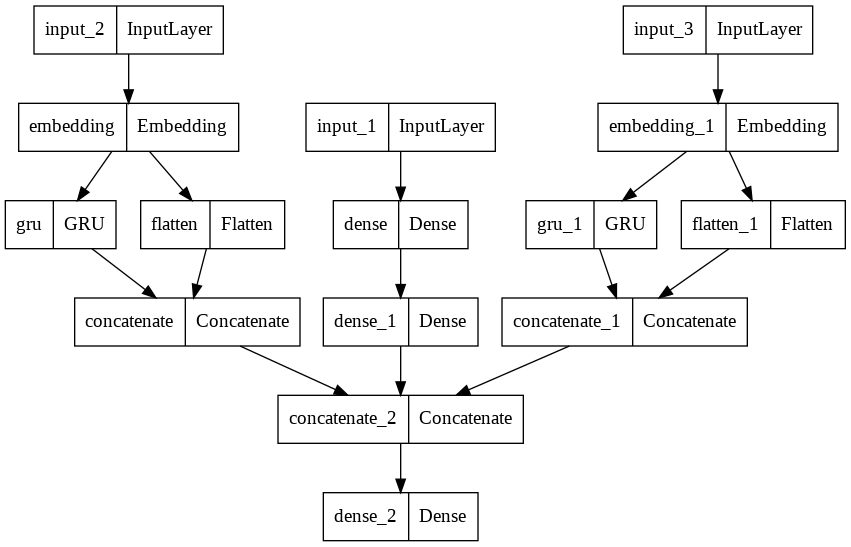

In [45]:
tf.keras.utils.plot_model(model)

As we see here, we have three different inputs, the left one for the descriptions, the right one for tweets, the middle one for the regular x values.

middle : The regular x values is getting passed through two dense layers , then sent it to the concatenation layer.

right and left : both being embedded, the embeddings are being sent to a GRU and to a flattened, and the two outputs from GRU and flatten are getting concatenated back together.

the fifth row : the final three outputs get concatenated to one big vector

the final row : the concatenated vector sent to a dense layer to give our final three values.

## Training

In [46]:
import time

begin = time.time()

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

batch_size = 32
epochs = 3 #generally when using gru's, you only have to train for a very small number of epochs, usually it is fit best by the first or second epoch
#when i call the fit function i going to include a callback that will save the best epoch weights 
history = model.fit(
    [X_train, desc_train, tweets_train],
    y_train,
    validation_split = 0.2,
    batch_size = batch_size,
    epochs = epochs,
    callbacks=[
        tf.keras.callbacks.ModelCheckpoint('./model.h5',#this will let us save a hdf5 file with our model weights
                                           save_best_only=True,#save only the best epochs so we can load it up later 
                                           save_weights_only=True),#since we're just going to loading the weights
        tf.keras.callbacks.ReduceLROnPlateau()#which will help us converge a little more eaisly(reduce learning rate on plateau)       
    ]
)

end = time.time()

print("Time spent :", begin-end)

Epoch 1/3
329/329 [==============================] - 162s 480ms/step - loss: 0.8581 - accuracy: 0.5751 - val_loss: 0.7613 - val_accuracy: 0.6487 - lr: 0.0010
Epoch 2/3
329/329 [==============================] - 153s 465ms/step - loss: 0.3619 - accuracy: 0.8874 - val_loss: 0.8060 - val_accuracy: 0.6323 - lr: 0.0010
Epoch 3/3
329/329 [==============================] - 177s 537ms/step - loss: 0.0931 - accuracy: 0.9798 - val_loss: 0.8680 - val_accuracy: 0.6392 - lr: 0.0010
Time spent : -505.65333342552185


In [47]:
model.load_weights('./model.h5')

# Results

In [ ]:
results = model.evaluate([X_test, desc_test, tweets_test], y_test, verbose=0)#turn off the boast mode
print("Model Accracy: {:.2f}%".format(results[1] *100))#multiply by 100 to get the percentage, results[1] to get the accuray of the model not the loss or val_loss or val_accuracy

Model Accracy: 65.19%


In [ ]:
y_true = np.array(y_test)

y_predict = model.predict([X_test, desc_test, tweets_test])

y_predict

array([[4.2647946e-01, 4.7480765e-01, 9.8712869e-02],
       [4.6514621e-01, 2.6185873e-01, 2.7299502e-01],
       [3.3275143e-04, 8.0434931e-04, 9.9886286e-01],
       ...,
       [8.7856695e-02, 2.5267461e-01, 6.5946871e-01],
       [8.2251638e-02, 1.8693581e-01, 7.3081249e-01],
       [7.8169835e-01, 1.8348455e-01, 3.4817174e-02]], dtype=float32)

As we see here, it returns three different probability values for each example as that is what we set it to return these three values with a soft max activation, but we want the index of the highest probability which will our actual classification.

In [ ]:
y_predict = map(lambda x: np.argmax(x), y_predict)#x will be one of the three probability values and it is going to return the index of the maximum value, this is what we want
y_predict = np.array(list(y_predict))

In [ ]:
y_true

array([1, 1, 2, ..., 1, 2, 1])

In [ ]:
y_predict

array([1, 0, 2, ..., 2, 2, 0])

In [ ]:
#going to create a confusion matrix 
cm = confusion_matrix(y_true, y_predict)
clr = classification_report(y_true, y_predict, target_names=['Female','Male','Brand'])

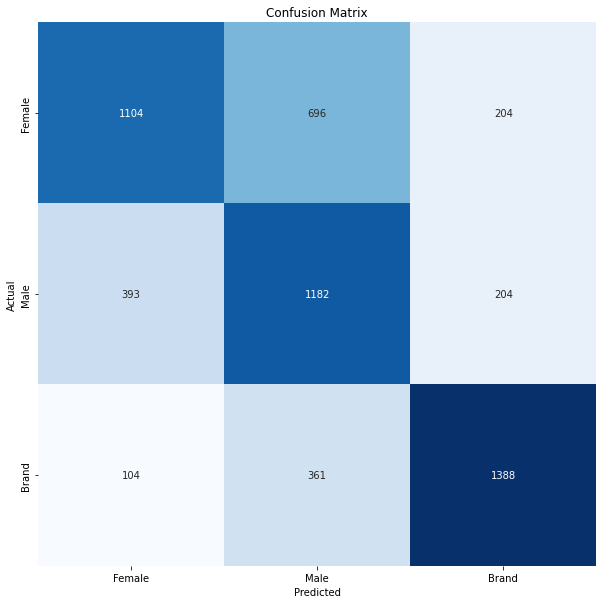

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='Blues')#annot=True so we can see the actual count values,,, fmt='g' to avoid the counts show in scientific notation 
plt.xticks(np.arange(3) + 0.5, ['Female','Male','Brand'])
plt.yticks(np.arange(3) + 0.5, ['Female','Male','Brand'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

  we see can here the number of predicted values for each category and compared with number of actual values for each category 

In [ ]:
print("Classification Report:\n\n", clr)

Classification Report:

               precision    recall  f1-score   support

      Female       0.69      0.55      0.61      2004
        Male       0.53      0.66      0.59      1779
       Brand       0.77      0.75      0.76      1853

    accuracy                           0.65      5636
   macro avg       0.66      0.65      0.65      5636
weighted avg       0.67      0.65      0.65      5636



As we see, the most easily calssified category was a
Brand: because precision = 0.77 which means that, 77% of our values were correct in the predictions. Recall = 0.75 which means out of all actual Brand values 75% were correct. Which means it is the easiest for the model to classify. 

female: precision=0.69 which means that, 69% of our values were correct in the predictions... recall=0.55 which means out of all actual female values 55% were correct.

male: precision=0.53 which means that, 53% of our values were correct in the predictions... recall=0.66 which means out of all actual female values 66% were correct. Which looks like a male category probably our worst category.which means it is the hardest for the model to classify

**Finally**

--- 
Model running time was: 505.65333342552185s

---

Model Accuracy : 65.19% which is good 

---

Ram usage : 1.82GB 

---

Disk space : 38.40GB

---

Macro avg(f1-score) : 65% / Macro avg(precision) : 67% / Macro avg(recall) : 65%

---

weighted avg(f1-score) : 65% / weighted avg(precision) : 66% / weighted avg(recall) : 65%